## Importing libraries that we will use

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go

## Load the CSV file into a pandas DataFrame using the read_csv() function.
Importing data from csv that contain the Bitcoin data. All the data for de csv files was obtained from https://coinmarketcap.com/ 

In [2]:
bitcoin = pd.read_csv('./Documents/UCD python for finance/project/data/Bitcoin - Bitcoin.csv')

In [3]:
bitcoin

Date       Open*        High         Low     Close**  \
0     feb 28, 2023  $23,521.84  $23,585.38  $23,077.65  $23,147.35   
1     feb 27, 2023  $23,561.45  $23,857.89  $23,205.88  $23,522.87   
2     feb 26, 2023  $23,174.15  $23,654.37  $23,084.22  $23,561.21   
3     feb 25, 2023  $23,200.13  $23,210.21  $22,861.56  $23,175.38   
4     feb 24, 2023  $23,946.01  $24,103.70  $23,007.07  $23,198.13   
...            ...         ...         ...         ...         ...   
3589  may 02, 2013     $116.38     $125.60      $92.28     $105.21   
3590  may 01, 2013     $139.00     $139.89     $107.72     $116.99   
3591  Apr 30, 2013     $144.00     $146.93     $134.05     $139.00   
3592  Apr 29, 2013     $134.44     $147.49     $134.00     $144.54   
3593  Apr 28, 2013     $135.30     $135.98     $132.10     $134.21   

               Volume        Market Cap  
0     $20,535,363,434  $446,846,764,116  
1     $22,660,763,494  $454,075,216,420  
2     $16,644,534,842  $454,795,165,823  
3     $16,100,721,565  $447,323,985,683  
4     $26,811,744,928  $447,747,058,644  
...               ...               ...  
3589               $0    $1,168,517,495  
3590               $0    $1,298,954,594  
3591               $0    $1,542,813,125  
3592               $0    $1,603,768,865  
3593               $0    $1,488,566,728  

[3594 rows x 7 columns]

For to be sure that the contents of the DataFrame reflect the meaning of my data, we need to clean and inspect the data.

## Use the .head() method which displays the first 5 rows

In [4]:
bitcoin.head()

Date       Open*        High         Low     Close**  \
0  feb 28, 2023  $23,521.84  $23,585.38  $23,077.65  $23,147.35   
1  feb 27, 2023  $23,561.45  $23,857.89  $23,205.88  $23,522.87   
2  feb 26, 2023  $23,174.15  $23,654.37  $23,084.22  $23,561.21   
3  feb 25, 2023  $23,200.13  $23,210.21  $22,861.56  $23,175.38   
4  feb 24, 2023  $23,946.01  $24,103.70  $23,007.07  $23,198.13   

            Volume        Market Cap  
0  $20,535,363,434  $446,846,764,116  
1  $22,660,763,494  $454,075,216,420  
2  $16,644,534,842  $454,795,165,823  
3  $16,100,721,565  $447,323,985,683  
4  $26,811,744,928  $447,747,058,644

## Replace missing values

Some important questions to answer that will help to clean the data are:

Which data type would you expect pandas to assign to each column?
What symbol is used to represent a missing value?

Looking the data we will expect 6 columns type float64 and 1 column type datetime64.

We can see missing values from the first printing at the end of the data, we can print the last 5 rows to check, we will use .tail() function to display the last 5 rows.

In [5]:
bitcoin.tail()

Date    Open*     High      Low  Close** Volume      Market Cap
3589  may 02, 2013  $116.38  $125.60   $92.28  $105.21     $0  $1,168,517,495
3590  may 01, 2013  $139.00  $139.89  $107.72  $116.99     $0  $1,298,954,594
3591  Apr 30, 2013  $144.00  $146.93  $134.05  $139.00     $0  $1,542,813,125
3592  Apr 29, 2013  $134.44  $147.49  $134.00  $144.54     $0  $1,603,768,865
3593  Apr 28, 2013  $135.30  $135.98  $132.10  $134.21     $0  $1,488,566,728

The DataFrame show some values in cero in the column 'volume' at the last rows, are represented with value '0', in case that we need it in future analysis we will extract the column and see until what date we have data. In this analysis we will need some of this data, closing prices since 2013, this is the reason we are not removing this rows.

## Inspect the data
I will use the .info() to identify dtype mismatches in the DataFrame summary, see the content and the missing values.

In [6]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        3594 non-null   object
 1   Open*       3594 non-null   object
 2   High        3594 non-null   object
 3   Low         3594 non-null   object
 4   Close**     3594 non-null   object
 5   Volume      3594 non-null   object
 6   Market Cap  3594 non-null   object
dtypes: object(7)
memory usage: 196.7+ KB


This Dataframe has 3594 entries, in other words has 3594 rows and 7 columns 
as we can see the dtypes are all object, this is one thing that we need to change, then we will be able to work with the data as we want to manipulate numbers, that will help to get some results in our analysis. 

This DataFrame don't show any missing values, but we will use the na_values parameter to replace any missing values

We will use parse_dates parameter to turn things into real datetime types. parse_dates takes a list of columns, in case you want to parse multiple columns into datetimes.

In [7]:
bitcoin = pd.read_csv('./Documents/UCD python for finance/project/data/Bitcoin - Bitcoin.csv', na_values='n/a', parse_dates =['Date'])

In [8]:
bitcoin.head()

Date       Open*        High         Low     Close**           Volume  \
0 2023-02-28  $23,521.84  $23,585.38  $23,077.65  $23,147.35  $20,535,363,434   
1 2023-02-27  $23,561.45  $23,857.89  $23,205.88  $23,522.87  $22,660,763,494   
2 2023-02-26  $23,174.15  $23,654.37  $23,084.22  $23,561.21  $16,644,534,842   
3 2023-02-25  $23,200.13  $23,210.21  $22,861.56  $23,175.38  $16,100,721,565   
4 2023-02-24  $23,946.01  $24,103.70  $23,007.07  $23,198.13  $26,811,744,928   

         Market Cap  
0  $446,846,764,116  
1  $454,075,216,420  
2  $454,795,165,823  
3  $447,323,985,683  
4  $447,747,058,644

## Inspecting the data and changing dtypes.

In [9]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3594 non-null   datetime64[ns]
 1   Open*       3594 non-null   object        
 2   High        3594 non-null   object        
 3   Low         3594 non-null   object        
 4   Close**     3594 non-null   object        
 5   Volume      3594 non-null   object        
 6   Market Cap  3594 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 196.7+ KB


## Define a custom function to create reusable code
## Checking missing values

In [10]:
def check_missing_values(df):
    if df.isnull().values.any():
        print("The dataframe contains missing values.")
    else:
        print("The dataframe does not contain any missing values.")

check_missing_values(bitcoin)

The dataframe does not contain any missing values.


We use the isnull() method to check for missing values in the dataframe. The values attribute returns a numpy array of boolean values indicating whether each element is missing or not.

We use the any() method to check whether there is at least one missing value in the dataframe. If there are missing values, we print a message that the dataframe contains missing values. Otherwise, print that does not contain any missing values.

We can see that using this parameters, na_values and parse_dates, the column Date has changed to dtype like datetime64 and we are sure that we don't have any missing values.

Change the other 6 columns dtypes to float.



Convert multiple columns by passing a list of column names to the astype method.

bitcoin[['Open*', 'High','Low','Close**','Volume','Market Cap']] = bitcoin[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

This wasn't working because there are non numeric symbols like '$' and ','.

## Removing the non-numeric characters from the columns

In [11]:
bitcoin['Open*'] = bitcoin['Open*'].str.replace('[^\d\.]', '', regex=True)
bitcoin['High'] = bitcoin['High'].str.replace('[^\d\.]', '', regex=True)
bitcoin['Low'] = bitcoin['Low'].str.replace('[^\d\.]', '', regex=True)
bitcoin['Close**'] = bitcoin['Close**'].str.replace('[^\d\.]', '', regex=True)
bitcoin['Volume'] = bitcoin['Volume'].str.replace('[^\d\.]', '', regex=True)
bitcoin['Market Cap'] = bitcoin['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [12]:
bitcoin.head()

Date     Open*      High       Low   Close**       Volume  \
0 2023-02-28  23521.84  23585.38  23077.65  23147.35  20535363434   
1 2023-02-27  23561.45  23857.89  23205.88  23522.87  22660763494   
2 2023-02-26  23174.15  23654.37  23084.22  23561.21  16644534842   
3 2023-02-25  23200.13  23210.21  22861.56  23175.38  16100721565   
4 2023-02-24  23946.01  24103.70  23007.07  23198.13  26811744928   

     Market Cap  
0  446846764116  
1  454075216420  
2  454795165823  
3  447323985683  
4  447747058644

Printing the first 5 rows of the DataFrame, checking if the non-numerical characters are gone.

## Change the dtype from object to float64

In [13]:
bitcoin[['Open*', 'High','Low','Close**','Volume','Market Cap']] = bitcoin[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

Inspect the data .info() and see if the dtypes changed in all the columns.

In [14]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3594 non-null   datetime64[ns]
 1   Open*       3594 non-null   float64       
 2   High        3594 non-null   float64       
 3   Low         3594 non-null   float64       
 4   Close**     3594 non-null   float64       
 5   Volume      3594 non-null   float64       
 6   Market Cap  3594 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 196.7 KB


As we can see the dtypes of the 6 columns changed to float64 and we have one column with datetime64 that represents the Dates.

This change will help if we want to use the data and we want to compare different numbers to analize the prices sensibility.

## Function find duplicates Dates in the DataFrame.

We use the duplicated() method with the subset parameter set to 'Date' to check for duplicates in that column. The duplicated() method returns a boolean series where True indicates that the row is a duplicated and False indicates that it is not.

In [15]:
def check_duplicate_dates(df, date_column):
    # check for duplicates
    duplicates = df.duplicated(subset=[date_column])

    # get only the duplicated rows
    duplicated_rows = df[duplicates]

    # print out the duplicated row using the 'empty' attribute
    if duplicated_rows.empty:
        print("There are no duplicated dates.")
    else:
        print("The following rows have duplicated dates:")
        print(duplicated_rows)


check_duplicate_dates(bitcoin, 'Date')


There are no duplicated dates.


We use boolean indexing to get only the rows where duplicates is True. This gives us a new dataframe called duplicated_rows that contains only the rows with duplicate Date values.

## Indexing the column 'Date'

In [16]:
bitcoin.set_index('Date', inplace=True)

Use the set_index() method to set the 'Date' column as the index of the DataFrame.

Use the inplace=True parameter to modify the DataFrame in place, no create a new one.

In [17]:
bitcoin.head()

Open*      High       Low   Close**        Volume    Market Cap
Date                                                                          
2023-02-28  23521.84  23585.38  23077.65  23147.35  2.053536e+10  4.468468e+11
2023-02-27  23561.45  23857.89  23205.88  23522.87  2.266076e+10  4.540752e+11
2023-02-26  23174.15  23654.37  23084.22  23561.21  1.664453e+10  4.547952e+11
2023-02-25  23200.13  23210.21  22861.56  23175.38  1.610072e+10  4.473240e+11
2023-02-24  23946.01  24103.70  23007.07  23198.13  2.681174e+10  4.477471e+11

In [18]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3594 entries, 2023-02-28 to 2013-04-28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open*       3594 non-null   float64
 1   High        3594 non-null   float64
 2   Low         3594 non-null   float64
 3   Close**     3594 non-null   float64
 4   Volume      3594 non-null   float64
 5   Market Cap  3594 non-null   float64
dtypes: float64(6)
memory usage: 196.5 KB


The DataFrame has a DatetimeIndex with 3594 entries, contain one row for each day of trading days. 
Starting on 28/02/2023 until 28/04/2013.

There are 6 columns, the first 4 columns summarize the price distribution for the days, the first price, highest price, the lowest price, the last price and the last 2 columns represent the Volume and the Market Cap. 

## Sorting by Date

In [19]:
bitcoin_df = bitcoin.sort_values(by="Date", ascending=True)

In [20]:
bitcoin_df.head()

Open*    High     Low  Close**  Volume    Market Cap
Date                                                             
2013-04-28  135.30  135.98  132.10   134.21     0.0  1.488567e+09
2013-04-29  134.44  147.49  134.00   144.54     0.0  1.603769e+09
2013-04-30  144.00  146.93  134.05   139.00     0.0  1.542813e+09
2013-05-01  139.00  139.89  107.72   116.99     0.0  1.298955e+09
2013-05-02  116.38  125.60   92.28   105.21     0.0  1.168517e+09

The sort_values( ) function is used to sort by the values along either axis. In this case we use 2 parameters, by= that indicate the column reference, that we want to sort the data and ascending=True allow to get the sorting in ascending order.

## We have cleaned and ready our DataFrame(bitcoin) for start the analysis.

# Importing data from CSV for Ethereum

In [21]:
Ethereum = pd.read_csv('./Documents/UCD python for finance/project/data/Ethereum - Ethereum.csv', na_values='n/a', parse_dates =['Date'])

We will use the parameters 'na_values' for missing values and parse_dates to change the column 'Date', Dtype from object to datetime64.   

In [22]:
Ethereum

Date      Open*       High        Low    Close**          Volume  \
0    2023-02-28  $1,634.50  $1,644.44  $1,602.43  $1,605.90  $6,323,676,957   
1    2023-02-27  $1,640.76  $1,662.58  $1,615.39  $1,634.33  $7,239,824,677   
2    2023-02-26  $1,594.76  $1,645.27  $1,590.39  $1,640.82  $5,727,967,432   
3    2023-02-25  $1,608.66  $1,608.87  $1,567.63  $1,594.91  $5,657,686,235   
4    2023-02-24  $1,650.90  $1,661.09  $1,583.15  $1,608.37  $8,909,129,423   
...         ...        ...        ...        ...        ...             ...   
2758 2015-08-11    $0.7081      $1.13    $0.6632      $1.07      $1,463,100   
2759 2015-08-10     $0.714    $0.7299    $0.6365    $0.7084        $405,283   
2760 2015-08-09    $0.7061    $0.8798    $0.6292    $0.7019        $532,170   
2761 2015-08-08      $2.79      $2.80    $0.7147    $0.7533        $674,188   
2762 2015-08-07      $2.83      $3.54      $2.52      $2.77        $164,329   

            Market Cap  
0     $196,519,595,896  
1     $199,998,836,364  
2     $200,793,139,093  
3     $195,175,909,086  
4     $196,822,841,716  
...                ...  
2758       $64,569,288  
2759       $42,818,364  
2760       $42,399,573  
2761       $45,486,894  
2762      $166,610,555  

[2763 rows x 7 columns]

## Clean the data  

## Display and Inspect the data

In [23]:
Ethereum.head()

Date      Open*       High        Low    Close**          Volume  \
0 2023-02-28  $1,634.50  $1,644.44  $1,602.43  $1,605.90  $6,323,676,957   
1 2023-02-27  $1,640.76  $1,662.58  $1,615.39  $1,634.33  $7,239,824,677   
2 2023-02-26  $1,594.76  $1,645.27  $1,590.39  $1,640.82  $5,727,967,432   
3 2023-02-25  $1,608.66  $1,608.87  $1,567.63  $1,594.91  $5,657,686,235   
4 2023-02-24  $1,650.90  $1,661.09  $1,583.15  $1,608.37  $8,909,129,423   

         Market Cap  
0  $196,519,595,896  
1  $199,998,836,364  
2  $200,793,139,093  
3  $195,175,909,086  
4  $196,822,841,716

In [24]:
Ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2763 non-null   datetime64[ns]
 1   Open*       2763 non-null   object        
 2   High        2763 non-null   object        
 3   Low         2763 non-null   object        
 4   Close**     2763 non-null   object        
 5   Volume      2763 non-null   object        
 6   Market Cap  2763 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 151.2+ KB


As we can see we need to change the Dtype from object to float64 for the last 6 columns. We have 2763 entries(rows) and 7 columns. The columns names are Date, Open* , High, Low, Close** , Volume, Market Cap.

### We don't have any missing values but we will check.

In [25]:
# Check for missing values
check_missing_values(Ethereum)

The dataframe does not contain any missing values.


## Removing the non-numeric characters from the colums

In [26]:
Ethereum['Open*'] = Ethereum['Open*'].str.replace('[^\d\.]', '', regex=True)
Ethereum['High'] = Ethereum['High'].str.replace('[^\d\.]', '', regex=True)
Ethereum['Low'] = Ethereum['Low'].str.replace('[^\d\.]', '', regex=True)
Ethereum['Close**'] = Ethereum['Close**'].str.replace('[^\d\.]', '', regex=True)
Ethereum['Volume'] = Ethereum['Volume'].str.replace('[^\d\.]', '', regex=True)
Ethereum['Market Cap'] = Ethereum['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [27]:
Ethereum.head()

Date    Open*     High      Low  Close**      Volume    Market Cap
0 2023-02-28  1634.50  1644.44  1602.43  1605.90  6323676957  196519595896
1 2023-02-27  1640.76  1662.58  1615.39  1634.33  7239824677  199998836364
2 2023-02-26  1594.76  1645.27  1590.39  1640.82  5727967432  200793139093
3 2023-02-25  1608.66  1608.87  1567.63  1594.91  5657686235  195175909086
4 2023-02-24  1650.90  1661.09  1583.15  1608.37  8909129423  196822841716

## Change the dtype from object to float64

In [28]:
Ethereum[['Open*', 'High','Low','Close**','Volume','Market Cap']] = Ethereum[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

In [29]:
Ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2763 non-null   datetime64[ns]
 1   Open*       2763 non-null   float64       
 2   High        2763 non-null   float64       
 3   Low         2763 non-null   float64       
 4   Close**     2763 non-null   float64       
 5   Volume      2763 non-null   float64       
 6   Market Cap  2763 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 151.2 KB


We changed the Dtype to float64.

## Function find duplicates Dates in the DataFrame.

In [30]:
check_duplicate_dates(Ethereum, 'Date')

There are no duplicated dates.


## Indexing the column 'Date'

In [31]:
Ethereum.set_index('Date', inplace=True)

In [32]:
Ethereum.head()

Open*     High      Low  Close**        Volume    Market Cap
Date                                                                      
2023-02-28  1634.50  1644.44  1602.43  1605.90  6.323677e+09  1.965196e+11
2023-02-27  1640.76  1662.58  1615.39  1634.33  7.239825e+09  1.999988e+11
2023-02-26  1594.76  1645.27  1590.39  1640.82  5.727967e+09  2.007931e+11
2023-02-25  1608.66  1608.87  1567.63  1594.91  5.657686e+09  1.951759e+11
2023-02-24  1650.90  1661.09  1583.15  1608.37  8.909129e+09  1.968228e+11

In [33]:
Ethereum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2763 entries, 2023-02-28 to 2015-08-07
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open*       2763 non-null   float64
 1   High        2763 non-null   float64
 2   Low         2763 non-null   float64
 3   Close**     2763 non-null   float64
 4   Volume      2763 non-null   float64
 5   Market Cap  2763 non-null   float64
dtypes: float64(6)
memory usage: 151.1 KB


The Datetime Index = have 2763 entries(rows), the Dates are 28/02/2023 until 07/08/2015.

## Sorting by Date

In [34]:
Ethereum_df = Ethereum.sort_values(by="Date", ascending=True)

In [35]:
Ethereum_df.head()

Open*    High     Low  Close**     Volume   Market Cap
Date                                                               
2015-08-07  2.8300  3.5400  2.5200   2.7700   164329.0  166610555.0
2015-08-08  2.7900  2.8000  0.7147   0.7533   674188.0   45486894.0
2015-08-09  0.7061  0.8798  0.6292   0.7019   532170.0   42399573.0
2015-08-10  0.7140  0.7299  0.6365   0.7084   405283.0   42818364.0
2015-08-11  0.7081  1.1300  0.6632   1.0700  1463100.0   64569288.0

## We have cleaned and ready our DataFrame(Ethereum) for start the analysis.

# Importing data from CSV for BNB (Binance Coin)

Using the function read_csv() to import the data with 2 parameters, na_values for missing values and parse_dates to change the Dtype of the dates to datetime64.

In [36]:
BNB = pd.read_csv('./Documents/UCD python for finance/project/data/BNB - BNB.csv', na_values='n/a', parse_dates =['Date'])

In [37]:
BNB

Date    Open*     High       Low  Close**        Volume  \
0    2023-02-28  $304.85  $305.63   $300.57  $301.47  $337,673,265   
1    2023-02-27  $308.99  $309.33   $300.94  $304.86  $404,806,423   
2    2023-02-26  $302.37  $309.59   $300.97  $309.00  $312,320,211   
3    2023-02-25  $302.10  $303.03   $297.22  $302.38  $310,503,640   
4    2023-02-24  $308.46  $311.80   $300.06  $302.05  $479,926,281   
...         ...      ...      ...       ...      ...           ...   
2040 2017-07-29  $0.1048  $0.1113   $0.1011  $0.1078      $340,218   
2041 2017-07-28  $0.1076   $0.109   $0.1015  $0.1041      $342,568   
2042 2017-07-27  $0.1051  $0.1085   $0.1009  $0.1077      $344,499   
2043 2017-07-26  $0.1059   $0.109  $0.09927  $0.1051      $200,395   
2044 2017-07-25  $0.1152  $0.1158   $0.1015  $0.1059      $145,269   

           Market Cap  
0     $47,601,444,433  
1     $48,135,374,451  
2     $48,789,334,459  
3     $47,745,317,304  
4     $47,693,139,026  
...               ...  
2040      $10,781,100  
2041      $10,406,700  
2042      $10,773,700  
2043      $10,513,800  
2044      $10,587,000  

[2045 rows x 7 columns]

## Clean the data. Display and Inspect

In [38]:
BNB.head()

Date    Open*     High      Low  Close**        Volume  \
0 2023-02-28  $304.85  $305.63  $300.57  $301.47  $337,673,265   
1 2023-02-27  $308.99  $309.33  $300.94  $304.86  $404,806,423   
2 2023-02-26  $302.37  $309.59  $300.97  $309.00  $312,320,211   
3 2023-02-25  $302.10  $303.03  $297.22  $302.38  $310,503,640   
4 2023-02-24  $308.46  $311.80  $300.06  $302.05  $479,926,281   

        Market Cap  
0  $47,601,444,433  
1  $48,135,374,451  
2  $48,789,334,459  
3  $47,745,317,304  
4  $47,693,139,026

The method info() prints information about the DataFrame, the index dtype and columns, non-null values and memory usage.

In [39]:
BNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2045 non-null   datetime64[ns]
 1   Open*       2045 non-null   object        
 2   High        2045 non-null   object        
 3   Low         2045 non-null   object        
 4   Close**     2045 non-null   object        
 5   Volume      2045 non-null   object        
 6   Market Cap  2045 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 112.0+ KB


We have 2045 entries and 7 columns with the Date with the correct Dtype(datetime64) and we need to change the rest of the columns Data types for to manipulate the data.

### The DataFrame don't have any missing values, but we will check.

In [40]:
# Check for missing values
check_missing_values(BNB)

The dataframe does not contain any missing values.


## Removing the non-numeric characters from the colums

In [41]:
BNB['Open*'] = BNB['Open*'].str.replace('[^\d\.]', '', regex=True)
BNB['High'] = BNB['High'].str.replace('[^\d\.]', '', regex=True)
BNB['Low'] = BNB['Low'].str.replace('[^\d\.]', '', regex=True)
BNB['Close**'] = BNB['Close**'].str.replace('[^\d\.]', '', regex=True)
BNB['Volume'] = BNB['Volume'].str.replace('[^\d\.]', '', regex=True)
BNB['Market Cap'] = BNB['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [42]:
BNB.head()

Date   Open*    High     Low Close**     Volume   Market Cap
0 2023-02-28  304.85  305.63  300.57  301.47  337673265  47601444433
1 2023-02-27  308.99  309.33  300.94  304.86  404806423  48135374451
2 2023-02-26  302.37  309.59  300.97  309.00  312320211  48789334459
3 2023-02-25  302.10  303.03  297.22  302.38  310503640  47745317304
4 2023-02-24  308.46  311.80  300.06  302.05  479926281  47693139026

## Change the dtype from object to float64

In [43]:
BNB[['Open*', 'High','Low','Close**','Volume','Market Cap']] = BNB[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

In [44]:
BNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2045 non-null   datetime64[ns]
 1   Open*       2045 non-null   float64       
 2   High        2045 non-null   float64       
 3   Low         2045 non-null   float64       
 4   Close**     2045 non-null   float64       
 5   Volume      2045 non-null   float64       
 6   Market Cap  2045 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 112.0 KB


As we can see, all the Dtypes are correct now, 1 datetime64 and 6 float64.

## Function find duplicates Dates in the DataFrame.

In [45]:
check_duplicate_dates(BNB, 'Date')

There are no duplicated dates.


## Indexing the column 'Date'

In [46]:
BNB.set_index('Date', inplace=True)

In [47]:
BNB.head()

Open*    High     Low  Close**       Volume    Market Cap
Date                                                                  
2023-02-28  304.85  305.63  300.57   301.47  337673265.0  4.760144e+10
2023-02-27  308.99  309.33  300.94   304.86  404806423.0  4.813537e+10
2023-02-26  302.37  309.59  300.97   309.00  312320211.0  4.878933e+10
2023-02-25  302.10  303.03  297.22   302.38  310503640.0  4.774532e+10
2023-02-24  308.46  311.80  300.06   302.05  479926281.0  4.769314e+10

In [48]:
BNB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2045 entries, 2023-02-28 to 2017-07-25
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open*       2045 non-null   float64
 1   High        2045 non-null   float64
 2   Low         2045 non-null   float64
 3   Close**     2045 non-null   float64
 4   Volume      2045 non-null   float64
 5   Market Cap  2045 non-null   float64
dtypes: float64(6)
memory usage: 111.8 KB


The Datetime Index = have 2045 entries(rows), the Dates are 28/02/2023 until 25/07/2017.

## Sorting by Date

In [49]:
BNB_df = BNB.sort_values(by="Date", ascending=True)

In [50]:
BNB_df.head()

Open*    High      Low  Close**    Volume  Market Cap
Date                                                              
2017-07-25  0.1152  0.1158  0.10150   0.1059  145269.0  10587000.0
2017-07-26  0.1059  0.1090  0.09927   0.1051  200395.0  10513800.0
2017-07-27  0.1051  0.1085  0.10090   0.1077  344499.0  10773700.0
2017-07-28  0.1076  0.1090  0.10150   0.1041  342568.0  10406700.0
2017-07-29  0.1048  0.1113  0.10110   0.1078  340218.0  10781100.0

## We have cleaned and ready our DataFrame(BNB) for start the analysis.

# Importing data from CSV for Dogecoin

Using the function read_csv() to import the data with 2 parameters, na_values for missing values and parse_dates to change the Dtype of the dates to datetime64.

In [52]:
Dogecoin = pd.read_csv('./Documents/UCD python for finance/project/data/Dogecoin - Dogecoin.csv', na_values='n/a', parse_dates =['Date'])

In [53]:
Dogecoin

Date       Open*        High         Low     Close**        Volume  \
0    2023-02-28    $0.08136    $0.08274     $0.0802    $0.08075  $370,709,700   
1    2023-02-27     $0.0822     $0.0822     $0.0802    $0.08135  $267,030,813   
2    2023-02-26    $0.08078    $0.08247    $0.08058     $0.0822  $218,231,642   
3    2023-02-25    $0.08091    $0.08178    $0.07906    $0.08079  $316,321,963   
4    2023-02-24    $0.08429     $0.0849    $0.07989     $0.0809  $449,138,535   
...         ...         ...         ...         ...         ...           ...   
3341 2014-01-05  $0.0003005  $0.0003121  $0.0002466  $0.0002707      $245,107   
3342 2014-01-04  $0.0003046  $0.0003205   $0.000256  $0.0003008      $313,907   
3343 2014-01-03  $0.0003533  $0.0003763  $0.0002926  $0.0003029      $303,106   
3344 2014-01-02  $0.0004486  $0.0004486  $0.0003306  $0.0003531      $318,037   
3345 2014-01-01  $0.0004228  $0.0004509  $0.0004228  $0.0004397      $307,917   

           Market Cap  
0     $10,713,046,353  
1     $10,793,363,610  
2     $10,905,805,148  
3     $10,717,881,956  
4     $10,733,124,752  
...               ...  
3341       $5,883,644  
3342       $6,323,972  
3343       $6,162,990  
3344       $6,935,467  
3345       $8,335,005  

[3346 rows x 7 columns]

## Clean the data. Display and Inspect

In [54]:
Dogecoin.head()

Date     Open*      High       Low   Close**        Volume  \
0 2023-02-28  $0.08136  $0.08274   $0.0802  $0.08075  $370,709,700   
1 2023-02-27   $0.0822   $0.0822   $0.0802  $0.08135  $267,030,813   
2 2023-02-26  $0.08078  $0.08247  $0.08058   $0.0822  $218,231,642   
3 2023-02-25  $0.08091  $0.08178  $0.07906  $0.08079  $316,321,963   
4 2023-02-24  $0.08429   $0.0849  $0.07989   $0.0809  $449,138,535   

        Market Cap  
0  $10,713,046,353  
1  $10,793,363,610  
2  $10,905,805,148  
3  $10,717,881,956  
4  $10,733,124,752

In [55]:
Dogecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3346 non-null   datetime64[ns]
 1   Open*       3346 non-null   object        
 2   High        3346 non-null   object        
 3   Low         3346 non-null   object        
 4   Close**     3346 non-null   object        
 5   Volume      3346 non-null   object        
 6   Market Cap  3346 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 183.1+ KB


We have 3346 entries and 7 columns. The Date with the correct Dtype(datetime64) and we need to change the rest of the columns Data types.

### With the info() we can see that the DataFrame don't have any missing values, but we will check.

In [56]:
# Check for missing values
check_missing_values(Dogecoin)

The dataframe does not contain any missing values.


## Removing the non-numeric characters from the colums

In [57]:
Dogecoin['Open*'] = Dogecoin['Open*'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['High'] = Dogecoin['High'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['Low'] = Dogecoin['Low'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['Close**'] = Dogecoin['Close**'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['Volume'] = Dogecoin['Volume'].str.replace('[^\d\.]', '', regex=True)
Dogecoin['Market Cap'] = Dogecoin['Market Cap'].str.replace('[^\d\.]', '', regex=True)

In [58]:
Dogecoin.head()

Date    Open*     High      Low  Close**     Volume   Market Cap
0 2023-02-28  0.08136  0.08274   0.0802  0.08075  370709700  10713046353
1 2023-02-27   0.0822   0.0822   0.0802  0.08135  267030813  10793363610
2 2023-02-26  0.08078  0.08247  0.08058   0.0822  218231642  10905805148
3 2023-02-25  0.08091  0.08178  0.07906  0.08079  316321963  10717881956
4 2023-02-24  0.08429   0.0849  0.07989   0.0809  449138535  10733124752

We removed the non-numeric characters then we can change the Dtype.

## Change the dtype from object to float64

In [59]:
Dogecoin[['Open*', 'High','Low','Close**','Volume','Market Cap']] = Dogecoin[['Open*', 'High','Low','Close**','Volume','Market Cap']].astype(float)

In [60]:
Dogecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3346 non-null   datetime64[ns]
 1   Open*       3346 non-null   float64       
 2   High        3346 non-null   float64       
 3   Low         3346 non-null   float64       
 4   Close**     3346 non-null   float64       
 5   Volume      3346 non-null   float64       
 6   Market Cap  3346 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 183.1 KB


As we can see, all the Dtypes are correct now, 1 datetime64 and 6 float64.

## Function find duplicated Dates in the DataFrame.

In [61]:
check_duplicate_dates(Dogecoin, 'Date')

There are no duplicated dates.


## Indexing the column 'Date'

In [62]:
Dogecoin.set_index('Date', inplace=True)

Use the set_index() method to set the 'Date' column as the index of the DataFrame.
Use the inplace=True parameter to modify the DataFrame in place, no creating a new one.

In [63]:
Dogecoin.head()

Open*     High      Low  Close**       Volume    Market Cap
Date                                                                     
2023-02-28  0.08136  0.08274  0.08020  0.08075  370709700.0  1.071305e+10
2023-02-27  0.08220  0.08220  0.08020  0.08135  267030813.0  1.079336e+10
2023-02-26  0.08078  0.08247  0.08058  0.08220  218231642.0  1.090581e+10
2023-02-25  0.08091  0.08178  0.07906  0.08079  316321963.0  1.071788e+10
2023-02-24  0.08429  0.08490  0.07989  0.08090  449138535.0  1.073312e+10

In [64]:
Dogecoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3346 entries, 2023-02-28 to 2014-01-01
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open*       3346 non-null   float64
 1   High        3346 non-null   float64
 2   Low         3346 non-null   float64
 3   Close**     3346 non-null   float64
 4   Volume      3346 non-null   float64
 5   Market Cap  3346 non-null   float64
dtypes: float64(6)
memory usage: 183.0 KB


We have the 'Date' indexed with 3346 entries, 28/02/2023 to 01/01/2014. and the rest 6 columns have the correct data type float64 that will allow us to work with this data.

## Sorting by Date

In [65]:
Dogecoin_df = Dogecoin.sort_values(by="Date", ascending=True)

In [66]:
Dogecoin_df.head()

Open*      High       Low   Close**    Volume  Market Cap
Date                                                                    
2014-01-01  0.000423  0.000451  0.000423  0.000440  307917.0   8335005.0
2014-01-02  0.000449  0.000449  0.000331  0.000353  318037.0   6935467.0
2014-01-03  0.000353  0.000376  0.000293  0.000303  303106.0   6162990.0
2014-01-04  0.000305  0.000320  0.000256  0.000301  313907.0   6323972.0
2014-01-05  0.000300  0.000312  0.000247  0.000271  245107.0   5883644.0

## We have cleaned and ready our DataFrame(Dogecoin) for start the analysis.

# API COINGECKO (Ripple XRP) Data

In [79]:
import requests
from datetime import datetime, timedelta
import pandas as pd

# API endpoint and parameters
url = "https://api.coingecko.com/api/v3/coins/ripple/market_chart"
params = {
    "vs_currency": "usd",
    "days": "2085",
    "interval": "1d"
}

# make a GET request to the API to get the tether market chart data
response = requests.get(url, params=params)

# extract the market chart data from the response
market_chart_data = response.json()

# create a dataframe to store the market chart data
df = pd.DataFrame(market_chart_data["prices"], columns=["date", "price"])

# convert the Unix timestamps in the "date" column to datetime objects
df["date"] = pd.to_datetime(df["date"],unit="ms")

# add new columns for open, high, low, and close prices
df["open"] = df["price"].shift(1)
df["high"] = df[["price", "open"]].max(axis=1)
df["low"] = df[["price", "open"]].min(axis=1)
df["close"] = df["price"]

# set the index of the dataframe "date" column
df.set_index("date", inplace=True)

# drop the "price" column
df.drop("price", axis=1, inplace=True)

# set the column order
df = df[["open", "high", "low", "close"]]

# add new columns for volume and market cap data
df["volume"] = [v[1] for v in market_chart_data["total_volumes"]]
df["marketCap"] = [mc[1] for mc in market_chart_data["market_caps"]]

# print the dataframe
print(df)


                         open      high       low     close        volume  \
date                                                                        
2017-07-10 00:00:00       NaN  0.205350  0.205350  0.205350  1.170460e+08   
2017-07-11 00:00:00  0.205350  0.205350  0.186181  0.186181  2.798930e+08   
2017-07-12 00:00:00  0.186181  0.205163  0.186181  0.205163  1.509730e+08   
2017-07-13 00:00:00  0.205163  0.205163  0.202281  0.202281  2.189200e+08   
2017-07-14 00:00:00  0.202281  0.202281  0.189839  0.189839  9.709860e+07   
...                       ...       ...       ...       ...           ...   
2023-03-22 00:00:00  0.377235  0.470749  0.377235  0.470749  4.548748e+09   
2023-03-23 00:00:00  0.470749  0.470749  0.425218  0.425218  4.517426e+09   
2023-03-24 00:00:00  0.425218  0.448220  0.425218  0.448220  2.294537e+09   
2023-03-25 00:00:00  0.448220  0.448220  0.426800  0.426800  1.705300e+09   
2023-03-25 18:10:00  0.426800  0.462831  0.426800  0.462831  2.152411e+09   

In [83]:
df.head()

open      high       low     close       volume     marketCap
date                                                                         
2017-07-10       NaN  0.205350  0.205350  0.205350  117046000.0  7.863136e+09
2017-07-11  0.205350  0.205350  0.186181  0.186181  279893000.0  7.129129e+09
2017-07-12  0.186181  0.205163  0.186181  0.205163  150973000.0  7.855976e+09
2017-07-13  0.205163  0.205163  0.202281  0.202281  218920000.0  7.745620e+09
2017-07-14  0.202281  0.202281  0.189839  0.189839   97098600.0  7.269199e+09

In [84]:
# Checking the dtype of the index
date_index = df.index
print(date_index)

DatetimeIndex(['2017-07-10 00:00:00', '2017-07-11 00:00:00',
               '2017-07-12 00:00:00', '2017-07-13 00:00:00',
               '2017-07-14 00:00:00', '2017-07-15 00:00:00',
               '2017-07-16 00:00:00', '2017-07-17 00:00:00',
               '2017-07-18 00:00:00', '2017-07-19 00:00:00',
               ...
               '2023-03-17 00:00:00', '2023-03-18 00:00:00',
               '2023-03-19 00:00:00', '2023-03-20 00:00:00',
               '2023-03-21 00:00:00', '2023-03-22 00:00:00',
               '2023-03-23 00:00:00', '2023-03-24 00:00:00',
               '2023-03-25 00:00:00', '2023-03-25 18:10:00'],
              dtype='datetime64[ns]', name='date', length=2086, freq=None)


### GROUPBY Group the rows by the date portion of the timestamp, and select only the row with the earliest timestamp for each date using the first() method. The resulting DataFrame will have only one row per date, with the earliest timestamp of the day and the corresponding value.

In [85]:
df_grouped_ripple = df.groupby(df.index.date).first()
df_grouped_ripple

open      high       low     close        volume     marketCap
2017-07-10       NaN  0.205350  0.205350  0.205350  1.170460e+08  7.863136e+09
2017-07-11  0.205350  0.205350  0.186181  0.186181  2.798930e+08  7.129129e+09
2017-07-12  0.186181  0.205163  0.186181  0.205163  1.509730e+08  7.855976e+09
2017-07-13  0.205163  0.205163  0.202281  0.202281  2.189200e+08  7.745620e+09
2017-07-14  0.202281  0.202281  0.189839  0.189839  9.709860e+07  7.269199e+09
...              ...       ...       ...       ...           ...           ...
2023-03-21  0.389287  0.389287  0.377235  0.377235  1.313129e+09  1.922628e+10
2023-03-22  0.377235  0.470749  0.377235  0.470749  4.548748e+09  2.396360e+10
2023-03-23  0.470749  0.470749  0.425218  0.425218  4.517426e+09  2.168747e+10
2023-03-24  0.425218  0.448220  0.425218  0.448220  2.294537e+09  2.283801e+10
2023-03-25  0.448220  0.448220  0.426800  0.426800  1.705300e+09  2.186055e+10

[2085 rows x 6 columns]

In [86]:
# Check if the index is unique
print(df_grouped_ripple.index.is_unique)

True


In [87]:
# Cleaning Data
df_grouped_ripple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 2017-07-10 to 2023-03-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2084 non-null   float64
 1   high       2085 non-null   float64
 2   low        2085 non-null   float64
 3   close      2085 non-null   float64
 4   volume     2085 non-null   float64
 5   marketCap  2085 non-null   float64
dtypes: float64(6)
memory usage: 178.6+ KB


The Dtype are the correct float64 for the 6 columns and the index 'date', dtype='datetime64[ns]. we checked that we don't have any repeat date already.
We have 2085 entries, and the dates are between 2017-07-10 to 2023-03-25.

In [88]:
# Check for missing values
check_missing_values(df_grouped_ripple)

The dataframe contains missing values.


In [89]:
# drop rows with any missing value
df_grouped_ripple.dropna(inplace=True)
df_grouped_ripple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2084 entries, 2017-07-11 to 2023-03-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2084 non-null   float64
 1   high       2084 non-null   float64
 2   low        2084 non-null   float64
 3   close      2084 non-null   float64
 4   volume     2084 non-null   float64
 5   marketCap  2084 non-null   float64
dtypes: float64(6)
memory usage: 114.0+ KB


We drop the row that contained missing values, with this inspection in the data we can see that doesn't have any missing values in the rest of the columns and now we have 2084 entries. 

In [90]:
df_grouped_ripple

open      high       low     close        volume     marketCap
2017-07-11  0.205350  0.205350  0.186181  0.186181  2.798930e+08  7.129129e+09
2017-07-12  0.186181  0.205163  0.186181  0.205163  1.509730e+08  7.855976e+09
2017-07-13  0.205163  0.205163  0.202281  0.202281  2.189200e+08  7.745620e+09
2017-07-14  0.202281  0.202281  0.189839  0.189839  9.709860e+07  7.269199e+09
2017-07-15  0.189839  0.189839  0.171654  0.171654  1.321390e+08  6.572870e+09
...              ...       ...       ...       ...           ...           ...
2023-03-21  0.389287  0.389287  0.377235  0.377235  1.313129e+09  1.922628e+10
2023-03-22  0.377235  0.470749  0.377235  0.470749  4.548748e+09  2.396360e+10
2023-03-23  0.470749  0.470749  0.425218  0.425218  4.517426e+09  2.168747e+10
2023-03-24  0.425218  0.448220  0.425218  0.448220  2.294537e+09  2.283801e+10
2023-03-25  0.448220  0.448220  0.426800  0.426800  1.705300e+09  2.186055e+10

[2084 rows x 6 columns]

In [91]:
# filter dataframe for dates between '2017-08-01' and '2023-02-28'
start_date = pd.to_datetime('2017-08-01')
end_date = pd.to_datetime('2023-02-28')
filtered_prices_ripple = df_grouped_ripple.loc[start_date:end_date]
filtered_prices_ripple

/Users/karina/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1541: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]
/Users/karina/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:3629: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.get_loc(casted_key)


open      high       low     close        volume     marketCap
2017-08-01  0.167145  0.176560  0.167145  0.176560  1.195020e+08  6.768090e+09
2017-08-02  0.176560  0.176560  0.173609  0.173609  5.893240e+07  6.654970e+09
2017-08-03  0.173609  0.174492  0.173609  0.174492  3.155220e+07  6.690694e+09
2017-08-04  0.174492  0.174492  0.174084  0.174084  4.533110e+07  6.675049e+09
2017-08-05  0.174084  0.184159  0.174084  0.184159  1.126470e+08  7.061364e+09
...              ...       ...       ...       ...           ...           ...
2023-02-24  0.395359  0.395359  0.389572  0.389572  1.131968e+09  1.981537e+10
2023-02-25  0.389572  0.389572  0.379095  0.379095  1.058056e+09  1.932507e+10
2023-02-26  0.379095  0.379095  0.378689  0.378689  6.471966e+08  1.928360e+10
2023-02-27  0.378689  0.378689  0.378009  0.378009  5.401594e+08  1.926709e+10
2023-02-28  0.378009  0.379337  0.378009  0.379337  1.153759e+09  1.933275e+10

[2038 rows x 6 columns]

### We have ready the DataFrame with Ripple data from Coingecko API, this code will allow to get data from whatever Cryptocurrency that you want the only change that we need to do is change the url that spicify the coin. 

# Bitcoin Historical Analysis 

We will start the analisis with the most important and famous cryptocurrency. Bitcoin, i want to show the progress through the years, how the price has changed being the most expensive cryptocurrency in the market at the moment.

In [92]:
bitcoin_df

Open*      High       Low   Close**        Volume    Market Cap
Date                                                                          
2013-04-28    135.30    135.98    132.10    134.21  0.000000e+00  1.488567e+09
2013-04-29    134.44    147.49    134.00    144.54  0.000000e+00  1.603769e+09
2013-04-30    144.00    146.93    134.05    139.00  0.000000e+00  1.542813e+09
2013-05-01    139.00    139.89    107.72    116.99  0.000000e+00  1.298955e+09
2013-05-02    116.38    125.60     92.28    105.21  0.000000e+00  1.168517e+09
...              ...       ...       ...       ...           ...           ...
2023-02-24  23946.01  24103.70  23007.07  23198.13  2.681174e+10  4.477471e+11
2023-02-25  23200.13  23210.21  22861.56  23175.38  1.610072e+10  4.473240e+11
2023-02-26  23174.15  23654.37  23084.22  23561.21  1.664453e+10  4.547952e+11
2023-02-27  23561.45  23857.89  23205.88  23522.87  2.266076e+10  4.540752e+11
2023-02-28  23521.84  23585.38  23077.65  23147.35  2.053536e+10  4.468468e+11

[3594 rows x 6 columns]

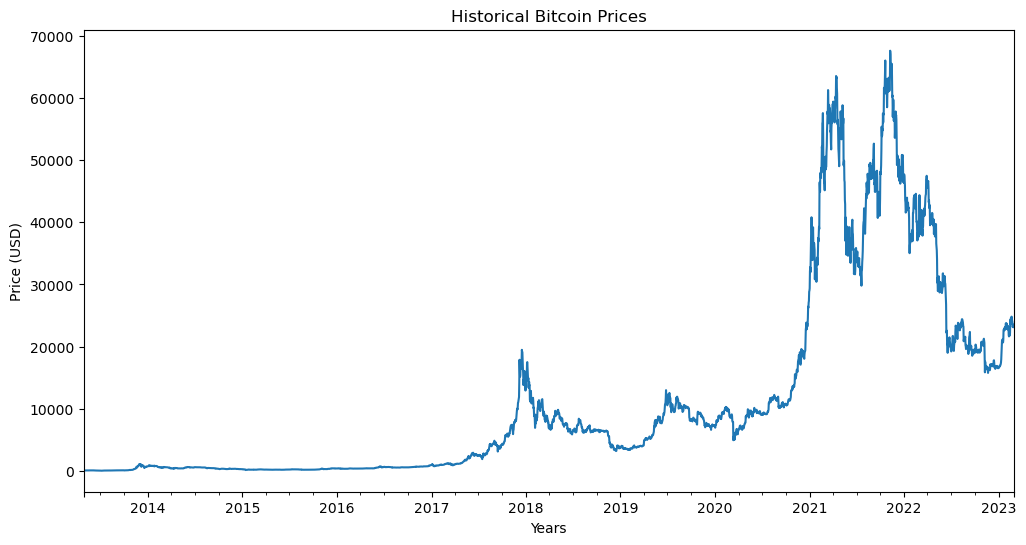

In [93]:
bitcoin_df['Close**'].plot(figsize=(12,6))
plt.title("Historical Bitcoin Prices")
plt.xlabel('Years')
plt.ylabel('Price (USD)')
plt.show()

When I made this graphic, I realize that will be very useful to have a dynamic graphic were we can see the prices through the years and we can have a better overview that was is happening with the prices up and down during the years, then I learned how to use the library called plotly. This library can make dynamic graphics that help you see the data better for analysis, an compare important points. 

Start, install the libraries !pip install plotly and !pip install cufflinks. 

Once we have installed this libraries, import the libraries.

In [94]:
import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public', theme='ggplot', offline=True)

In [95]:
bitcoin_df['Close**'].iplot(kind='line', xTitle='Years', yTitle='Price (USD)', title='Historical Bitcoin Prices')

On December 2017 we have a huge raise in price, starting the year on January with 777.76 and finish the year on December with 19,497.40. The price is 25 times higher in only some months.
As we can see if the inversionist bought Bitcoin during 2014,2015 or 2016; on 2017 they will have a lot of profit as the price grows 25 times, the best scenario until now, is selling on December 2017. 
On 2018 the price when down finishing december with 3,252.84, in this case they can buy as the price is going down and will expect to go up again in the next years.
On the 2021 was the best time to sell the Bitcoin as the price raise until 67,000 on November and 64,000 in April, was the time when the value of Bitcoin raise high levels.

In [96]:
bitcoin_df['Market Cap'].iplot(kind='line', xTitle='Years', yTitle='Market Cap', title='Market Capitalization BTC')

# DataFrames for the 4 Cryptocurrencies that we will analize Bitcoin_df,Ethereum_df,BNB_df and Dogecoin_df.

Create a Dataframe that contains the closing price of all 4 cryptocurrencies.

As we have different starting dates for each cryptocurrency, I decide to filter the dataframe to take the dates since 01-08-2017 to 28-02-2023 for all the cryptocurrencies.
The date column is the index of our dataframe, we will use the .loc[] function in pandas to filter the dataframe based on the index values.


In [97]:
prices_df = pd.DataFrame ({'BTC-USD': bitcoin_df['Close**'],'ETH-USD':Ethereum_df['Close**'],'BNB-USD': BNB_df['Close**'],'DOGE-USD': Dogecoin_df['Close**']})


In [98]:
# filter dataframe for dates between '2017-08-01' and '2023-02-28'
start_date = pd.to_datetime('2017-08-01')
end_date = pd.to_datetime('2023-02-28')
filteredprices = prices_df.loc[start_date:end_date]
filteredprices

BTC-USD  ETH-USD    BNB-USD  DOGE-USD
Date                                              
2017-08-01   2718.26   226.77    0.09987  0.001792
2017-08-02   2710.67   219.95    0.10050  0.001788
2017-08-03   2804.73   225.34    0.10660  0.001795
2017-08-04   2895.89   223.07    0.10750  0.001820
2017-08-05   3252.91   256.51    0.12890  0.002087
...              ...      ...        ...       ...
2023-02-24  23198.13  1608.37  302.05000  0.080900
2023-02-25  23175.38  1594.91  302.38000  0.080790
2023-02-26  23561.21  1640.82  309.00000  0.082200
2023-02-27  23522.87  1634.33  304.86000  0.081350
2023-02-28  23147.35  1605.90  301.47000  0.080750

[2038 rows x 4 columns]

 # MERGE

Now that we have the DataFrame 'filteredprices' with the prices on the csv files that we obtain from the CoinMarketCap website about Bitcoin, Ethereum, BNB and Dogecoin, we will try to merge the Close Prices from the other Dataframe 'filtered_prices_ripple' with the Ripple data that we obtain from Coingecko API.
My goal is to merge two Dataframes with Data that i get from different sources. 

In [99]:
filteredprices

BTC-USD  ETH-USD    BNB-USD  DOGE-USD
Date                                              
2017-08-01   2718.26   226.77    0.09987  0.001792
2017-08-02   2710.67   219.95    0.10050  0.001788
2017-08-03   2804.73   225.34    0.10660  0.001795
2017-08-04   2895.89   223.07    0.10750  0.001820
2017-08-05   3252.91   256.51    0.12890  0.002087
...              ...      ...        ...       ...
2023-02-24  23198.13  1608.37  302.05000  0.080900
2023-02-25  23175.38  1594.91  302.38000  0.080790
2023-02-26  23561.21  1640.82  309.00000  0.082200
2023-02-27  23522.87  1634.33  304.86000  0.081350
2023-02-28  23147.35  1605.90  301.47000  0.080750

[2038 rows x 4 columns]

In [100]:
# reset the index
filteredprices.reset_index(inplace=True)
filteredprices

Date   BTC-USD  ETH-USD    BNB-USD  DOGE-USD
0    2017-08-01   2718.26   226.77    0.09987  0.001792
1    2017-08-02   2710.67   219.95    0.10050  0.001788
2    2017-08-03   2804.73   225.34    0.10660  0.001795
3    2017-08-04   2895.89   223.07    0.10750  0.001820
4    2017-08-05   3252.91   256.51    0.12890  0.002087
...         ...       ...      ...        ...       ...
2033 2023-02-24  23198.13  1608.37  302.05000  0.080900
2034 2023-02-25  23175.38  1594.91  302.38000  0.080790
2035 2023-02-26  23561.21  1640.82  309.00000  0.082200
2036 2023-02-27  23522.87  1634.33  304.86000  0.081350
2037 2023-02-28  23147.35  1605.90  301.47000  0.080750

[2038 rows x 5 columns]

In [101]:
filtered_prices_ripple

open      high       low     close        volume     marketCap
2017-08-01  0.167145  0.176560  0.167145  0.176560  1.195020e+08  6.768090e+09
2017-08-02  0.176560  0.176560  0.173609  0.173609  5.893240e+07  6.654970e+09
2017-08-03  0.173609  0.174492  0.173609  0.174492  3.155220e+07  6.690694e+09
2017-08-04  0.174492  0.174492  0.174084  0.174084  4.533110e+07  6.675049e+09
2017-08-05  0.174084  0.184159  0.174084  0.184159  1.126470e+08  7.061364e+09
...              ...       ...       ...       ...           ...           ...
2023-02-24  0.395359  0.395359  0.389572  0.389572  1.131968e+09  1.981537e+10
2023-02-25  0.389572  0.389572  0.379095  0.379095  1.058056e+09  1.932507e+10
2023-02-26  0.379095  0.379095  0.378689  0.378689  6.471966e+08  1.928360e+10
2023-02-27  0.378689  0.378689  0.378009  0.378009  5.401594e+08  1.926709e+10
2023-02-28  0.378009  0.379337  0.378009  0.379337  1.153759e+09  1.933275e+10

[2038 rows x 6 columns]

In [102]:
# set the name attribute of the index
filtered_prices_ripple.index.name = 'Date'
# convert the index to datetime
filtered_prices_ripple.index = pd.to_datetime(filtered_prices_ripple.index)
# reset the index
filtered_prices_ripple.reset_index(inplace=True)
filtered_prices_ripple

Date      open      high       low     close        volume  \
0    2017-08-01  0.167145  0.176560  0.167145  0.176560  1.195020e+08   
1    2017-08-02  0.176560  0.176560  0.173609  0.173609  5.893240e+07   
2    2017-08-03  0.173609  0.174492  0.173609  0.174492  3.155220e+07   
3    2017-08-04  0.174492  0.174492  0.174084  0.174084  4.533110e+07   
4    2017-08-05  0.174084  0.184159  0.174084  0.184159  1.126470e+08   
...         ...       ...       ...       ...       ...           ...   
2033 2023-02-24  0.395359  0.395359  0.389572  0.389572  1.131968e+09   
2034 2023-02-25  0.389572  0.389572  0.379095  0.379095  1.058056e+09   
2035 2023-02-26  0.379095  0.379095  0.378689  0.378689  6.471966e+08   
2036 2023-02-27  0.378689  0.378689  0.378009  0.378009  5.401594e+08   
2037 2023-02-28  0.378009  0.379337  0.378009  0.379337  1.153759e+09   

         marketCap  
0     6.768090e+09  
1     6.654970e+09  
2     6.690694e+09  
3     6.675049e+09  
4     7.061364e+09  
...            ...  
2033  1.981537e+10  
2034  1.932507e+10  
2035  1.928360e+10  
2036  1.926709e+10  
2037  1.933275e+10  

[2038 rows x 7 columns]

We have 2038 rows in the two Dataframes with the dates between 2017-08-01 and 2023-02-28 then we can merge based on the Dates.

In [104]:
# merge the two dataframes based on Date
merged_df = pd.merge(filteredprices, filtered_prices_ripple[['Date','close']], on='Date', how='inner')
merged_df

Date   BTC-USD  ETH-USD    BNB-USD  DOGE-USD     close
0    2017-08-01   2718.26   226.77    0.09987  0.001792  0.176560
1    2017-08-02   2710.67   219.95    0.10050  0.001788  0.173609
2    2017-08-03   2804.73   225.34    0.10660  0.001795  0.174492
3    2017-08-04   2895.89   223.07    0.10750  0.001820  0.174084
4    2017-08-05   3252.91   256.51    0.12890  0.002087  0.184159
...         ...       ...      ...        ...       ...       ...
2033 2023-02-24  23198.13  1608.37  302.05000  0.080900  0.389572
2034 2023-02-25  23175.38  1594.91  302.38000  0.080790  0.379095
2035 2023-02-26  23561.21  1640.82  309.00000  0.082200  0.378689
2036 2023-02-27  23522.87  1634.33  304.86000  0.081350  0.378009
2037 2023-02-28  23147.35  1605.90  301.47000  0.080750  0.379337

[2038 rows x 6 columns]

We merged the 2 DataFrames and the new called merged_df have 2038 rows and 6 columns that represent the Close Prices of each cryptocurrencie with the name of the columns in the top.

In [105]:
# Changing the name 'close' to 'XRP-USD'
merged_df = merged_df.rename(columns={'close': 'XRP-USD'})

# Convert 'Date' column to datetime type
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# set the 'Date' column as the index
merged_df.set_index('Date', inplace=True)
merged_df

BTC-USD  ETH-USD    BNB-USD  DOGE-USD   XRP-USD
Date                                                        
2017-08-01   2718.26   226.77    0.09987  0.001792  0.176560
2017-08-02   2710.67   219.95    0.10050  0.001788  0.173609
2017-08-03   2804.73   225.34    0.10660  0.001795  0.174492
2017-08-04   2895.89   223.07    0.10750  0.001820  0.174084
2017-08-05   3252.91   256.51    0.12890  0.002087  0.184159
...              ...      ...        ...       ...       ...
2023-02-24  23198.13  1608.37  302.05000  0.080900  0.389572
2023-02-25  23175.38  1594.91  302.38000  0.080790  0.379095
2023-02-26  23561.21  1640.82  309.00000  0.082200  0.378689
2023-02-27  23522.87  1634.33  304.86000  0.081350  0.378009
2023-02-28  23147.35  1605.90  301.47000  0.080750  0.379337

[2038 rows x 5 columns]

## We have ready the DataFrame for the analysis

# Plotting

In [106]:
merged_df.iplot(kind='line', xTitle='Years', yTitle='Price', title='Prices of 5 Cryptocurrencies 2018-2023')

The cryptocurrencies have different scales then the first plot doesn't give us to much information about the behavior of the last 3 cryptocurrencies with the price that is less, compare with Bitcoin that is the most common and expensive cryptocurrency in the market at the moment. As this plot doesn't take the different scales into account, we will re-scale the prices to see better the different fluctuations of each cryptocurrency, all together in one graphic.

# Cryptocurrency prices over the last 5 years.

## Plotting prices for each cryptocurrency in subplots (separately) then we can see the patterns correctly.

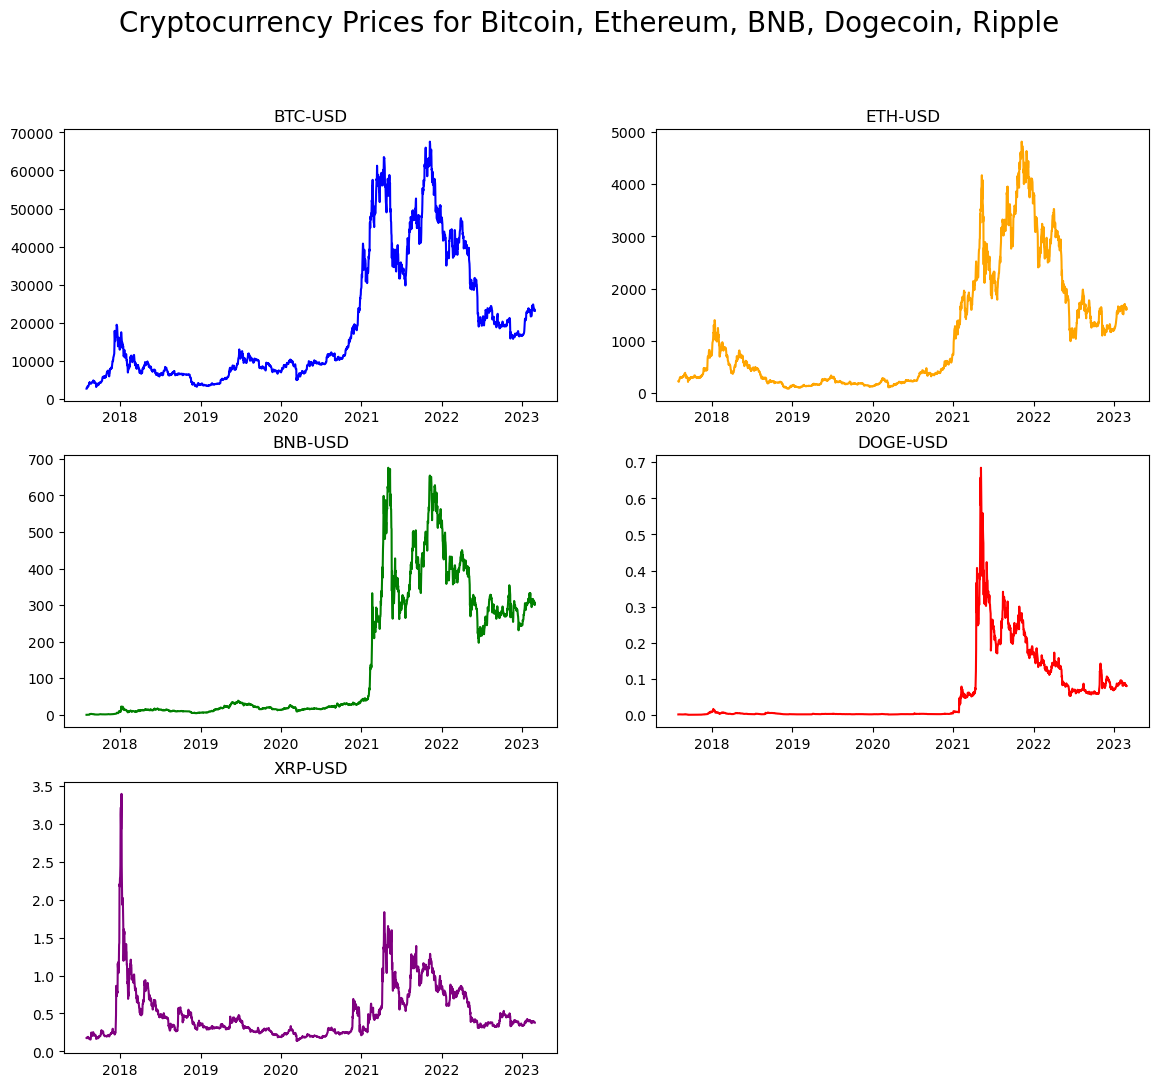

In [107]:
# define a list of colors for each cryptocurrency
colors = ['blue', 'orange', 'green', 'red', 'purple']

# create a figure with 5 subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# loop through the subplots and plot each cryptocurrency with a different color
for i, (name, col) in enumerate(merged_df.iteritems()):
    row = i // 2
    col_idx = i % 2
    axs[row, col_idx].plot(col.index, col.values, color=colors[i])
    axs[row, col_idx].set_title(name)

# title
fig.suptitle('Cryptocurrency Prices for Bitcoin, Ethereum, BNB, Dogecoin, Ripple', fontsize=20)

# remove the last empty subplot
fig.delaxes(axs[2, 1])

plt.show()


## Re-scale the prices to see better the different fluctuations of each cryptocurrency, all together in one graphic.

In [108]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(merged_df)
scaled

array([[1.17028205e-02, 3.01325358e+00, 0.00000000e+00, 1.51569020e-01,
        1.18782306e+00],
       [0.00000000e+00, 2.86899983e+00, 9.32531867e-05, 1.50984263e-01,
        1.09731881e+00],
       [1.45028630e-01, 2.98300682e+00, 9.96180868e-04, 1.52007588e-01,
        1.12439954e+00],
       ...,
       [3.21488969e+01, 3.29226402e+01, 4.57236849e+01, 1.19063547e+01,
        7.38692920e+00],
       [3.20897814e+01, 3.27853665e+01, 4.51108783e+01, 1.17820938e+01,
        7.36607893e+00],
       [3.15107771e+01, 3.21840272e+01, 4.46090873e+01, 1.16943803e+01,
        7.40678093e+00]])

In [109]:
#Convert into a dataframe
scaled_df = pd.DataFrame(scaled,columns = merged_df.columns)
scaled_df

BTC-USD    ETH-USD    BNB-USD   DOGE-USD   XRP-USD
0      0.011703   3.013254   0.000000   0.151569  1.187823
1      0.000000   2.869000   0.000093   0.150984  1.097319
2      0.145029   2.983007   0.000996   0.152008  1.124400
3      0.285586   2.934993   0.001129   0.155662  1.111887
4      0.836066   3.642301   0.004297   0.194695  1.420877
...         ...        ...        ...        ...       ...
2033  31.589073  32.236272  44.694939  11.716309  7.720702
2034  31.553996  31.951571  44.743786  11.700228  7.399381
2035  32.148897  32.922640  45.723685  11.906355  7.386929
2036  32.089781  32.785366  45.110878  11.782094  7.366079
2037  31.510777  32.184027  44.609087  11.694380  7.406781

[2038 rows x 5 columns]

We use the MinMaxScaler class from the preprocessing module of scikit-learn to scale the values of the dataset to a specified range.

preprocessing.MinMaxScaler() creates a new MinMaxScaler object that will be used to scale the data.

feature_range=(0,100) sets the range to which the data will be scaled. In this case, it will be scaled to the range of 0 to 100.

min_max_scaler.fit_transform(merged_df) applies the scaling to the merged_df dataset. The fit_transform() method fits the scaler to the data and then transforms it.

The scaled data is stored in the scaled variable.

# Plot scaled_df

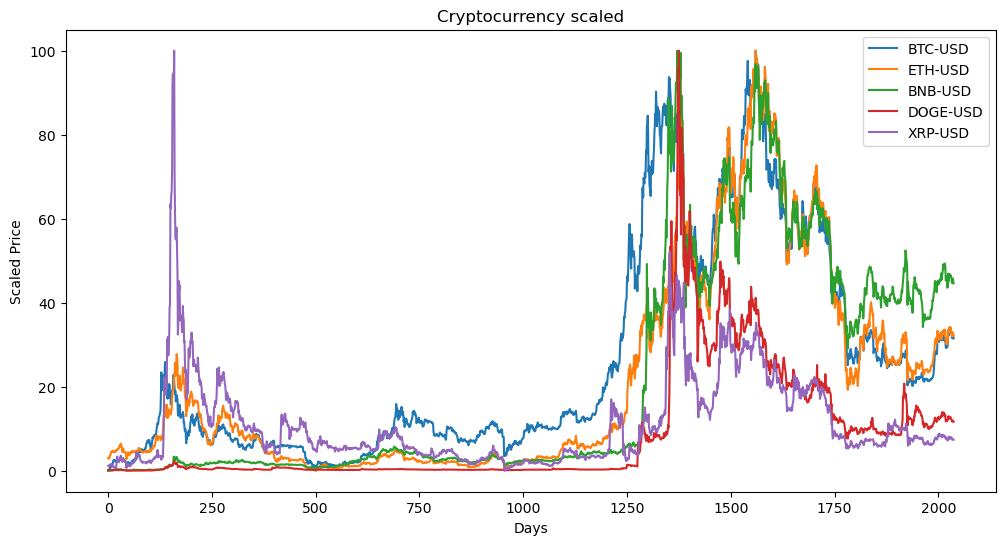

In [110]:
scaled_df.plot(figsize=(12,6), title = "Cryptocurrency scaled", xlabel = "Days", ylabel= "Scaled Price")
plt.show()

We can see, the cryptocurrencies have a correlation, when the prices drops in one cryptocurrency the others prices in the other cryptocurrencies drops as well and when the prices rises the other prices from the other cryptocurrencies rises as well.

In [111]:
#Show the candleticks
fig = go.Figure(data=[go.Candlestick(
    x = bitcoin_df.index,
    open = bitcoin_df['Open*'],
    close = bitcoin_df['Close**'],
    high = bitcoin_df['High'],
    low = bitcoin_df['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='Bitcoin Candlestick Chart')
fig.show()

In [112]:
# filter the data for 2021 as we see that in this time the price fluctuate more.
bitcoin_df_2021 = bitcoin_df.loc['2021']

fig = go.Figure(data=[go.Candlestick(
    x = bitcoin_df_2021.index,
    open = bitcoin_df_2021['Open*'],
    close = bitcoin_df_2021['Close**'],
    high = bitcoin_df_2021['High'],
    low = bitcoin_df_2021['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='Bitcoin Candlestick Chart - 2021')
fig.show()


In [113]:
#Show the candleticks
fig = go.Figure(data=[go.Candlestick(
    x = Ethereum_df.index,
    open = Ethereum_df['Open*'],
    close = Ethereum_df['Close**'],
    high = Ethereum_df['High'],
    low = Ethereum_df['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='Ethereum Candlestick Chart')
fig.show()

In [114]:
#Show the candleticks
fig = go.Figure(data=[go.Candlestick(
    x = BNB_df.index,
    open = BNB_df['Open*'],
    close = BNB_df['Close**'],
    high = BNB_df['High'],
    low = BNB_df['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='BNB Candlestick Chart')
fig.show()

In [115]:
#Show the candleticks
fig = go.Figure(data=[go.Candlestick(
    x = Dogecoin_df.index,
    open = Dogecoin_df['Open*'],
    close = Dogecoin_df['Close**'],
    high = Dogecoin_df['High'],
    low = Dogecoin_df['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='Dogecoin Candlestick Chart')
fig.show()

In [116]:
#Show the candleticks
fig = go.Figure(data=[go.Candlestick(
    x = df_grouped_ripple.index,
    open = df_grouped_ripple['open'],
    close = df_grouped_ripple['close'],
    high = df_grouped_ripple['high'],
    low = df_grouped_ripple['low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red',
)])
fig.update_layout(title='Ripple Candlestick Chart')
fig.show()

# Statistics

In [117]:
merged_df.describe()

BTC-USD      ETH-USD      BNB-USD     DOGE-USD      XRP-USD
count   2038.000000  2038.000000  2038.000000  2038.000000  2038.000000
mean   19399.342586  1101.130343   144.123503     0.058530     0.505005
std    16495.584187  1157.397985   180.425254     0.095397     0.357371
min     2710.670000    84.310000     0.099870     0.000755     0.137830
25%     7344.145000   220.085000    13.260000     0.002519     0.270383
50%    10799.315000   476.015000    23.985000     0.003642     0.379135
75%    29775.407500  1659.322500   293.872500     0.080780     0.633190
max    67566.830000  4812.090000   675.680000     0.684800     3.398450

We have 2038 rows of Data.

All of this statistics come from August '2017' until the end of February '2023'.

In this period of time, the minimum price of Bitcoin is 2710.67 and the max is 67,566.83. We can see that between this 5 years the price increase so much. The most popular and expensive coin is Bitcoin. With a mean of 19,399.34 and standard deviation of 16,495.58.

The minimum price of Ethereum is 84.31 and the maximum price is 4,812.09, the minimum price grow 57 times to compare with the maximum. Is the second most popular Cryptocurrency. Ripple is the other cryptocurrency that have a very significant difference between the min and max price.

# Daily returns  (Relative price changes).

In [118]:
daily_returns = merged_df.pct_change().dropna(axis=0)

In [119]:
daily_returns

BTC-USD   ETH-USD   BNB-USD  DOGE-USD   XRP-USD
Date                                                        
2017-08-02 -0.002792 -0.030075  0.006308 -0.002232 -0.016714
2017-08-03  0.034700  0.024506  0.060697  0.003915  0.005086
2017-08-04  0.032502 -0.010074  0.008443  0.013928 -0.002338
2017-08-05  0.123285  0.149908  0.199070  0.146703  0.057874
2017-08-06 -0.011980  0.019726  0.016292 -0.085290 -0.020933
...              ...       ...       ...       ...       ...
2023-02-24 -0.031292 -0.025862 -0.021003 -0.040218 -0.014636
2023-02-25 -0.000981 -0.008369  0.001093 -0.001360 -0.026894
2023-02-26  0.016648  0.028785  0.021893  0.017453 -0.001071
2023-02-27 -0.001627 -0.003955 -0.013398 -0.010341 -0.001795
2023-02-28 -0.015964 -0.017396 -0.011120 -0.007376  0.003511

[2037 rows x 5 columns]

pct_change() is a method in pandas library, that calculates the percentage change between the current element and its preceding element. We are using dropna() function to clean the data from non_numerical values.

# To get the price changes over time we have to accumulate the returns to compare the cryptocurrencies

We need the cumulative returns to make different scale assets comparable

In [120]:
daily_cum_returns = (daily_returns + 1).cumprod()-1

In [121]:
daily_cum_returns

BTC-USD   ETH-USD      BNB-USD   DOGE-USD   XRP-USD
Date                                                            
2017-08-02 -0.002792 -0.030075     0.006308  -0.002232 -0.016714
2017-08-03  0.031811 -0.006306     0.067388   0.001674 -0.011713
2017-08-04  0.065347 -0.016316     0.076399   0.015625 -0.014024
2017-08-05  0.196688  0.131146     0.290678   0.164621  0.043039
2017-08-06  0.182352  0.153459     0.311705   0.065290  0.021205
...              ...       ...          ...        ...       ...
2023-02-24  7.534184  6.092517  3023.431761  44.145089  1.206459
2023-02-25  7.525814  6.033161  3026.736057  44.083705  1.147119
2023-02-26  7.667754  6.235613  3093.022229  44.870536  1.144819
2023-02-27  7.653650  6.206994  3051.568339  44.396205  1.140969
2023-02-28  7.515503  6.081625  3017.624211  44.061384  1.148486

[2037 rows x 5 columns]

# Now with this data we can compare the cryptocurrencies

In [122]:
daily_cum_returns.iplot(kind='line', xTitle='Years', yTitle='Price', title='Cumulative Returns of the 5 Cryptocurrencies')
#This was the code for to make the graphic with matplotlib.pyplot
#daily_cum_returns.plot(figsize=(12,6))
#plt.tight_layout(); plt.show()

In [134]:
daily_cum_returns[['BTC-USD','ETH-USD','XRP-USD']].iplot(kind='line', xTitle='Years', yTitle='Price', title='Cumulative Returns of the 5 Cryptocurrencies')
#This was the code for to make the graphic with matplotlib.pyplot
#daily_cum_returns[['BTC-USD','ETH-USD','DOGE-USD', 'XRP-USD']].plot(figsize= (12,6))
#plt.show()

# Statistics daily returns of the cryptocurrencies in the last 5 years.

In [124]:
daily_returns.describe()

BTC-USD      ETH-USD      BNB-USD     DOGE-USD      XRP-USD
count  2037.000000  2037.000000  2037.000000  2037.000000  2037.000000
mean      0.001859     0.002243     0.006216     0.005406     0.002368
std       0.039968     0.050218     0.070476     0.108529     0.065331
min      -0.371695    -0.423462    -0.418886    -0.402460    -0.422790
25%      -0.015467    -0.020728    -0.022215    -0.024149    -0.023183
50%       0.001226     0.000883     0.001052    -0.000996    -0.000457
75%       0.018681     0.026877     0.029160     0.020528     0.021847
max       0.252472     0.264569     0.964158     3.554932     0.809534

# Daily returns (Volatility)

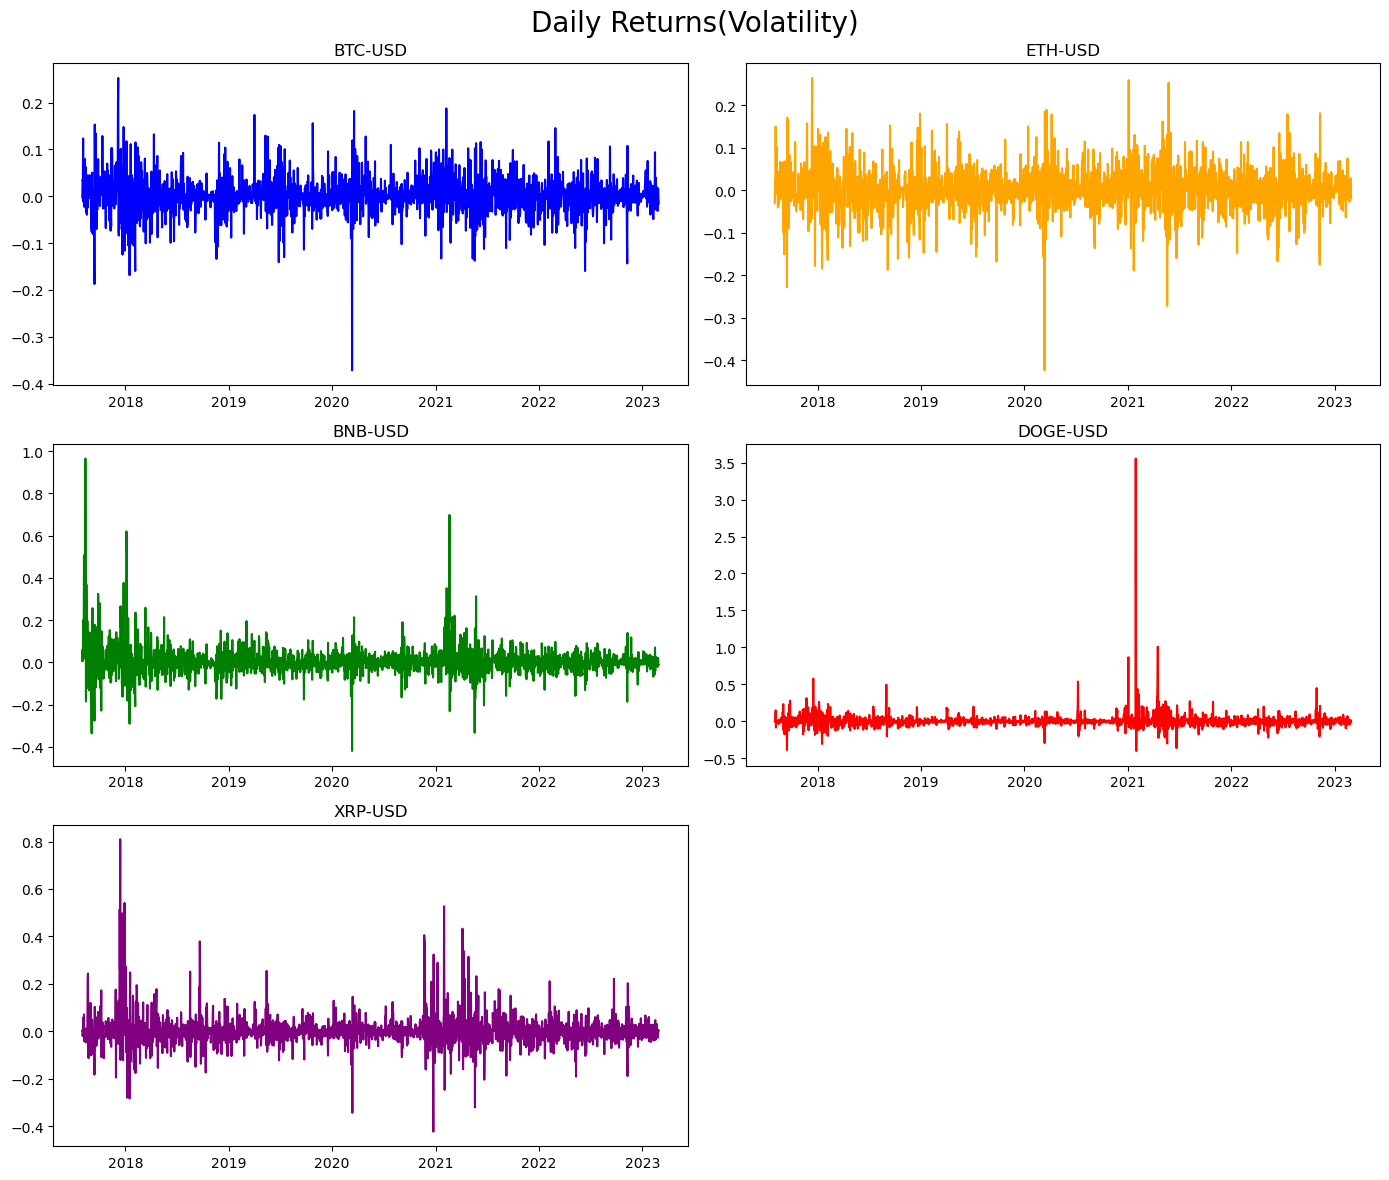

In [125]:
# define a list of colors for each cryptocurrency
colors = ['blue', 'orange', 'green', 'red', 'purple']

# create 5 subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# loop through the subplots and plot each cryptocurrency with a different color
for i, (name, col) in enumerate(daily_returns.iteritems()):
    row = i // 2
    col_idx = i % 2
    axs[row, col_idx].plot(col.index, col.values, color=colors[i])
    axs[row, col_idx].set_title(name)

#title
fig.suptitle('Daily Returns(Volatility)', fontsize=20)

# remove the last empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

Bitcoin: We can see a little line up in 2018 that indicates that Bitcoin was roughly raising by 25% and in 2020 we see other big line down, on this day Bitcoin was roughly falling by 35% 

# Distribution of the Daily Returns

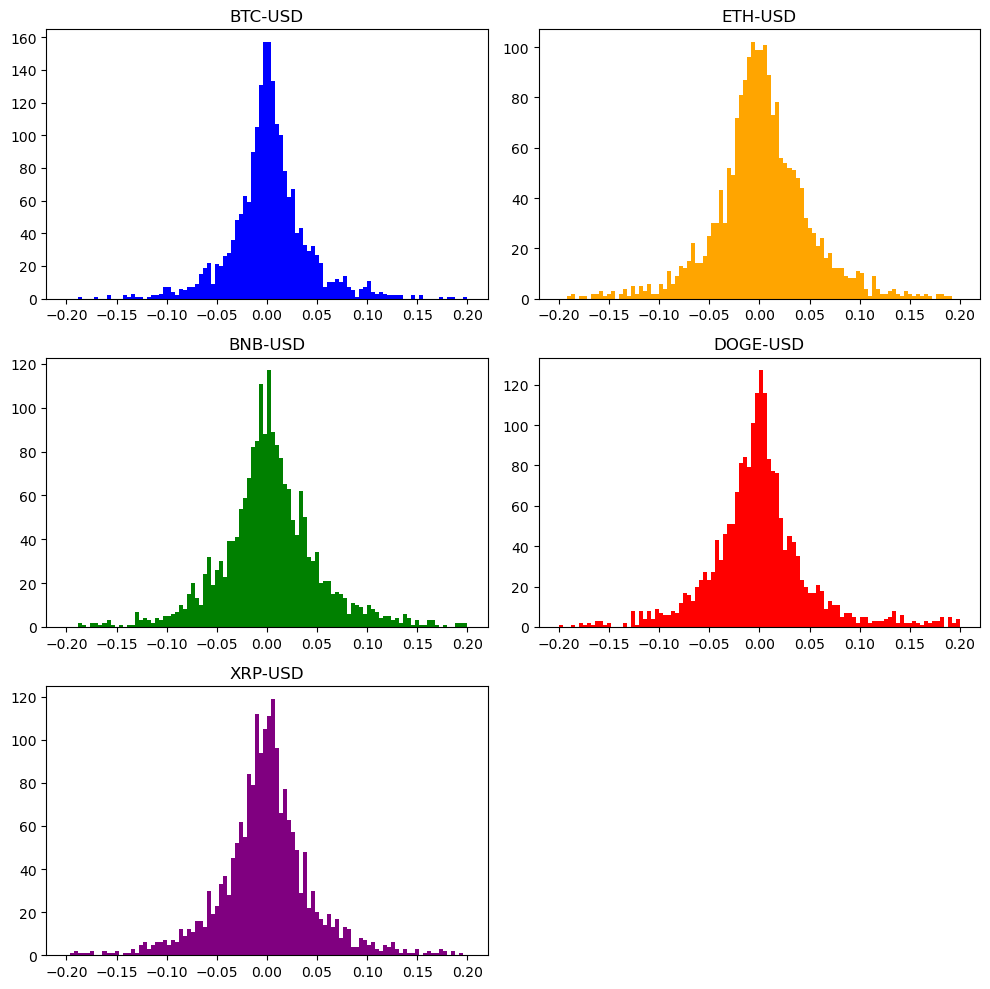

In [126]:
# define a list of colors for each cryptocurrency
colors = ['blue', 'orange', 'green', 'red', 'purple']

# create a 3 rows and 2 columns of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# loop through the subplots and plot a histogram of the data
for i, (name, col) in enumerate(daily_returns.iteritems()):
    row = i // 2
    col_idx = i % 2
    axs[row, col_idx].hist(col, range=(-0.2, 0.2), bins=100, color=colors[i])
    axs[row, col_idx].set_title(name)

# remove the last empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()


# Outliers

In [127]:
daily_returns.iplot(kind='box',title='Boxplot Daily Returns')

The boxplot summarizes the minimum, maximum, median, and quartiles of the distribution of daily returns. It can help to identify the center and the spread of the distribution, as well as the presence of outliers.

If the box in the boxplot is closer to the bottom, it indicates that the distribution of returns is negatively skewed, with more low returns than high returns. If the box is closer to the top, it suggests that the distribution is positively skewed, with more high returns than low returns.

Dogecoin, Ripple, and BNB their boxplot are closer to the bottom, which indicates that the distribution of returns is negatively skewed, with more low returns than high returns. 

Bitcoin and Ethereum their boxplot are closer to the top, which suggests that the distribution is positively skewed, with more high returns than low returns.

The length of the box can provide information on the degree of variation in the data, with a longer box indicating more variability in returns.

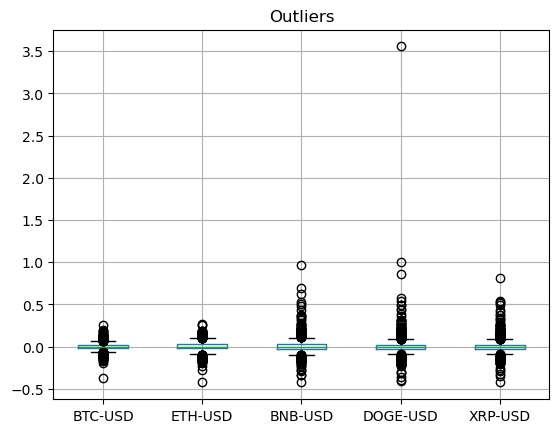

In [136]:
daily_returns.boxplot()
plt.title('Outliers')
plt.show()

# Correlations of Cryptocurrency Returns

In [128]:
daily_returns.corr()

BTC-USD   ETH-USD   BNB-USD  DOGE-USD   XRP-USD
BTC-USD   1.000000  0.768905  0.566348  0.370868 -0.013689
ETH-USD   0.768905  1.000000  0.548799  0.347263  0.023264
BNB-USD   0.566348  0.548799  1.000000  0.235636 -0.002021
DOGE-USD  0.370868  0.347263  0.235636  1.000000  0.029912
XRP-USD  -0.013689  0.023264 -0.002021  0.029912  1.000000

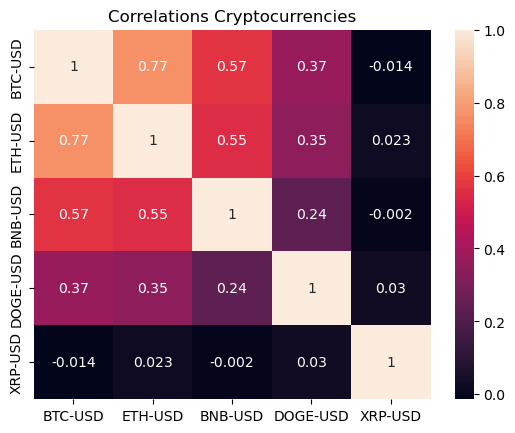

In [137]:
sns.heatmap(daily_returns.corr(),annot=True)
plt.title("Correlations Cryptocurrencies")
plt.show()

## Calculate the RSI

In [138]:
# Define period for RSI calculation
rsi_period = 14

# Calculate the difference between each price and the previous price
delta = bitcoin_df['Close**'].diff()

# Get rid of the first row, which is NaN
delta = delta[1:]

# Define up and down values
up = delta.copy()
down = delta.copy()

# Set up values to be positive and down values to be negative
up[up < 0] = 0
down[down > 0] = 0

# Calculate the average gain and loss
avg_gain = up.rolling(window=rsi_period).mean()
avg_loss = abs(down.rolling(window=rsi_period).mean())

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate the RSI
rsi = 100.0 - (100.0 / (1.0 + rs))
rsi

Date
2013-04-29          NaN
2013-04-30          NaN
2013-05-01          NaN
2013-05-02          NaN
2013-05-03          NaN
                ...    
2023-02-24    61.096645
2023-02-25    59.629640
2023-02-26    62.527326
2023-02-27    62.084338
2023-02-28    56.563986
Name: Close**, Length: 3593, dtype: float64

In [131]:
# Create and calculate the 30 day simple moving average
SMA30 = bitcoin_df['Close**'].rolling(window=30).mean()
bitcoin_df['SMA30'] = SMA30

<AxesSubplot:xlabel='Date'>

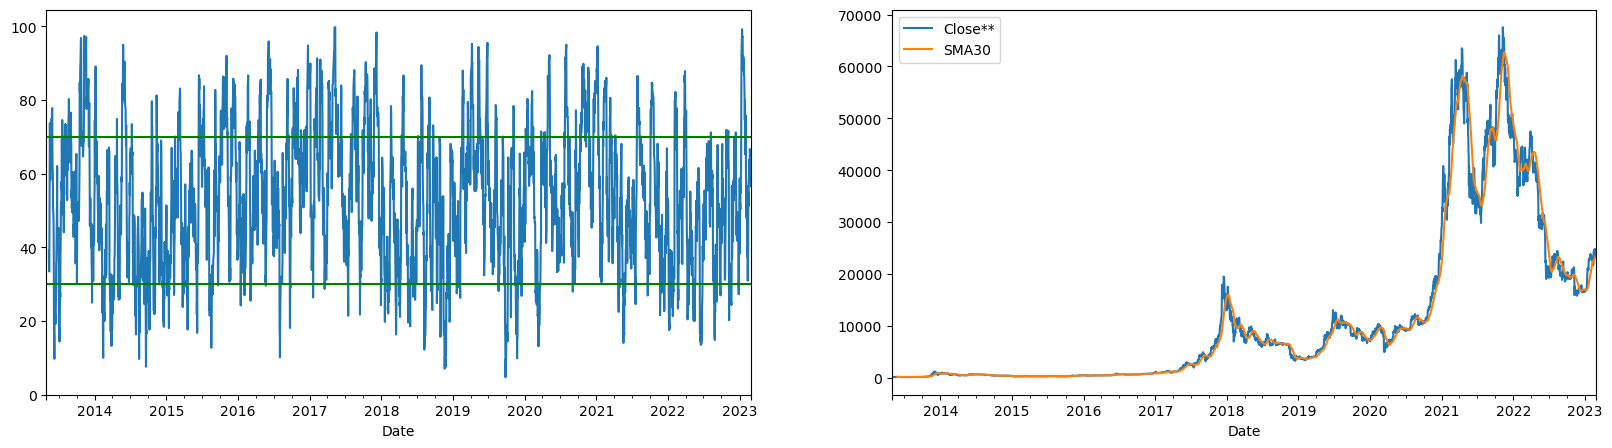

In [132]:
# Show the rsi and SMA
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax0 = rsi.plot(ax=ax[0])
ax0.axhline(30, color='green')
ax0.axhline(70, color='green')
# Plot the SMA
bitcoin_df[['Close**', 'SMA30']].plot(ax=ax[1])


The RSI period is set to 14, which is a common value used in technical analysis.

The code first calculates the difference between each closing price and the previous closing price, and then splits the difference into up and down values based on whether the price went up or down. It then calculates the average gain and loss over the RSI period, and uses these values to calculate the Relative Strength (RS). Finally, it uses the RS value to calculate the RSI

When the RSI value is above 70, it indicates that Bitcoin may be overbought and due for a price correction. When the RSI value is below 30, it indicates that Bitcoin may be oversold and due for a price increase.

The RSI indicator is widely used in technical analysis to identify potential price trend reversals and to help traders make buy and sell decisions. 